In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

In [11]:
Default = pd.read_csv('Default.csv')
Default.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


In [13]:
Default.shape

(10000, 4)

In [14]:
Default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374877,33516.981852
std,483.714957,13336.639582
min,0.000000,771.970000
25%,481.732500,21340.460000
50%,823.635000,34552.645000
75%,1166.305000,43807.730000
max,2654.320000,73554.230000


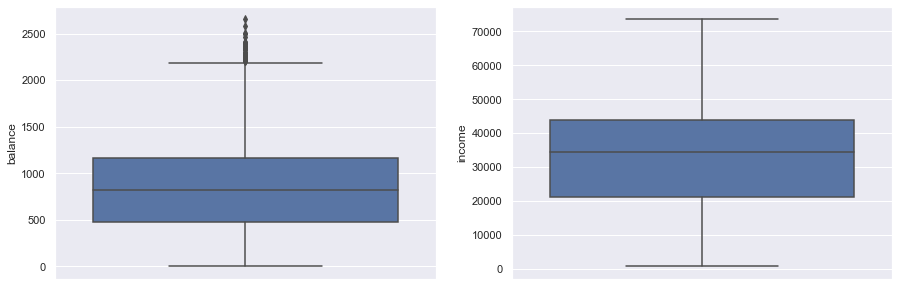

In [55]:
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
sns.boxplot(y= Default['balance']);


plt.subplot(1,2,2)
sns.boxplot(y= Default['income']);

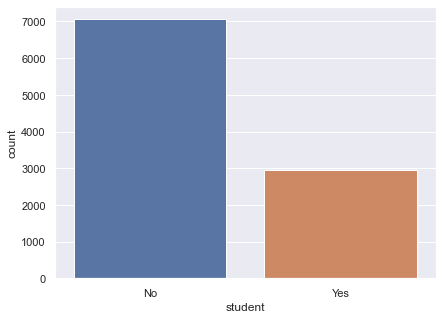

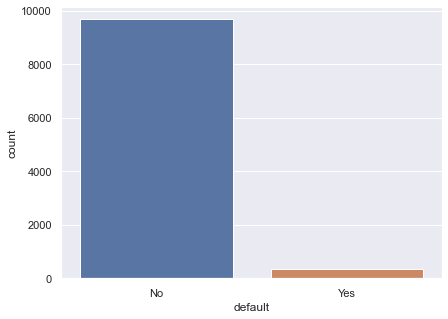

In [65]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(Default.student);

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(Default.default);

In [40]:
Default.student.value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [41]:
Default['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [42]:
Default.student.value_counts(normalize=True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [43]:
Default['default'].value_counts(normalize=True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

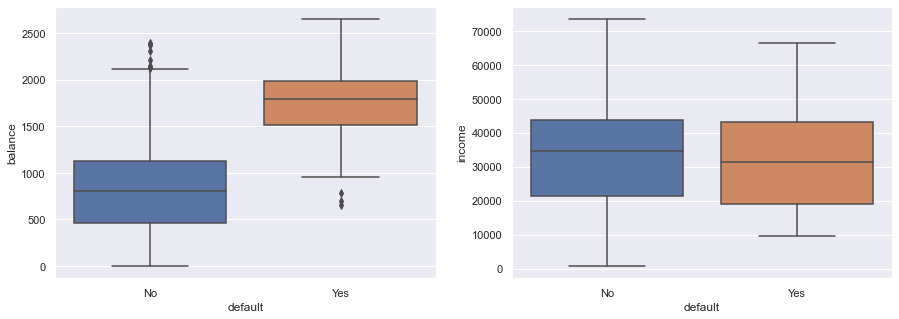

In [52]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(Default.default, Default.balance);

plt.subplot(1,2,2)
sns.boxplot(Default.default, Default.income);

In [60]:
pd.crosstab(Default.student, Default.default, normalize= 'index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


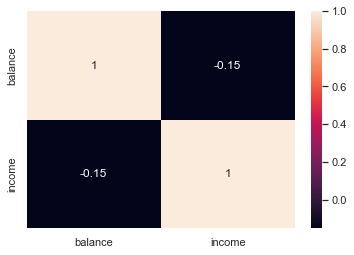

In [63]:
sns.heatmap(Default[['balance', 'income']].corr(), annot= True);

In [66]:
Default.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [69]:
Q1, Q3 = Default.balance.quantile([.25, .75])
IQR = Q3-Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [70]:
UL

2193.16375

In [71]:
df = Default[Default.balance > UL]

In [72]:
df

,default,student,balance,income
173,Yes,Yes,2205.80,14271.49
1136,Yes,No,2499.02,51504.29
1160,Yes,Yes,2502.68,14947.52
1359,Yes,No,2220.97,40725.10
1502,Yes,Yes,2332.88,11770.23
1609,Yes,Yes,2269.95,18021.11
2096,Yes,Yes,2261.85,20030.17
2140,No,Yes,2308.89,19110.27
2929,Yes,Yes,2387.31,28296.91
3162,Yes,Yes,2415.32,17429.50


In [73]:
df.default.count()

31

In [74]:
df.default.value_counts(normalize=True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [75]:
df.default.value_counts()

Yes    26
No      5
Name: default, dtype: int64

In [76]:
Default['balance'] = np.where(Default['balance'] > UL, UL, Default['balance'])

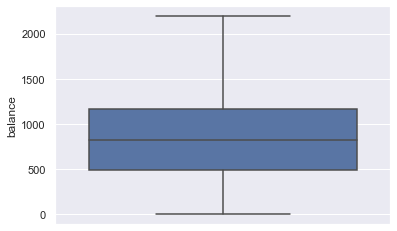

In [78]:
sns.boxplot(y = Default['balance']);